In [2]:
import pandas as pd
import pickle
import numpy as np
from datetime import datetime, timedelta
from EM import EM
import matplotlib.pyplot as plt
from plot import plot

In [3]:
cdm_t = pd.read_pickle('../Data/cdm_t.pkl')
cdm_s = pd.read_pickle('../Data/cdm_s.pkl')

In [4]:
signal_context = {}

In [5]:
signal_name = 'platelets'
treatment_names = {}
treatment_names['platelets_transfusion'] = ['transfuse_platelets']
treatment_names['ditp'] = ['ibuprofen_dose',
 'acetaminophen_dose',
 'ampicillin_dose',
 'heparin_dose',
 'vancomycin_dose',
 'piperacillin_tazobac_dose',
 'naproxen_dose']

chronic_keywords = ['liver', 'sickle_cell']
demographic_names = []
signal_context[signal_name] = (treatment_names, chronic_keywords, demographic_names)

In [6]:
signal_name = 'creatinine'

treatment_names = {}
treatment_names['dialysis'] = ['dialysis'] 
treatment_names['nephrotoxic_drugs'] = ['acetaminophen_dose','celecoxib_dose','diclofenac_dose','ibuprofen_dose','indomethacin_dose',
'ketorolac_dose','meloxicam_dose','naproxen_dose']
treatment_names['dronedarone'] = ['dronedarone_dose']
treatment_names['diuretic'] = ['eplerenone_dose', 'amiloride_dose', 'hydrochlorothiazide_dose',
'spironolactone_dose', 'triamterene_dose', 'chlorothiazide_dose', 'indapamide_dose', 'torsemide_dose', 
'acetazolamide_dose', 'mannitol_dose']
treatment_names['ace_i'] = ['lisinopril_dose',
 'ramipril_dose',
 'benazepril_dose',
 'enalaprilat_dose',
 'captopril_dose',
 'perindopril_dose',
 'trandolapril_dose']
treatment_names['arb'] = ['valsartan_dose',
 'telmisartan_dose',
 'irbesartan_dose',
 'losartan_dose',
 'candesartan_dose']

#treatment_names['search'] = ['losartan']

chronic_keywords = ['chronic_kidney', 'kidney_cancer', 'renal', 'esrd', 'sickle_cell']

demographic_names = ['gender', 'admit_weight']
signal_context[signal_name] = (treatment_names, chronic_keywords, demographic_names)

In [7]:
signal_name = 'creatinine'
treatment_names, chronic_keywords, demographic_names = signal_context[signal_name]

In [8]:
# chronic_names: 
# key: keywords of the relevant chronic conditions specified in chronic_keywords
# value: list of all the features in cdm_s that contain that keyword
# fill in chronic name dict by finding all the relevant fields available in cdm_s for each chronic keyword
chronic_names = {}
all_chronic = cdm_s.loc[:, 'fid'].unique()
for name in chronic_keywords:
    chronic_names[name] = [s for s in all_chronic if name in s]

In [9]:
# put all the treatment names into a list to get the corresponding columns
treatment_list = []
for name in treatment_names.values():
    treatment_list.append(name)
# flatten the list
treatment_list = [item for sublist in treatment_list for item in sublist]

In [10]:
# df_t is part of the original dataframe that has all the ids who have measurements for the signal we are interested 
# in
signal = cdm_t.loc[cdm_t.loc[:, 'fid'] == signal_name, 'value']
ids = np.unique(cdm_t.loc[signal.index, 'enc_id'])
df_t = cdm_t.loc[cdm_t.loc[:, 'enc_id'].isin(ids), :]

In [11]:
# df_t is now part of the dataframe that contains only the rows with fid being either the signal or the treatments
df_t = df_t.loc[df_t.loc[:, 'fid'].isin(treatment_list + [signal_name]), :]

In [12]:
# convert tsp field to python datetime object
df_t.loc[:, 'tsp'] = df_t.loc[:, 'tsp'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S+%f'))
#df_t.loc[:, 'tsp'] = df_t.groupby('enc_id')['tsp'].apply(lambda x: x - x.iloc[0])

In [12]:
df_t = df_t.loc[df_t.loc[:, 'fid'].isin(['transfuse_platelets', 'platelets']), :]

In [19]:
ids = np.unique(df_t.loc[df_t['fid']=='transfuse_platelets', 'enc_id'])
df_t = df_t.loc[df_t['enc_id'].isin(ids), :]

In [61]:
index_after_binned = np.array([ 9019, 14243, 21493, 21810, 22846, 24172, 26041, 26535, 39820,
       39880, 40278, 41259, 41391, 41580, 45535, 46232, 47871, 48933,
       52675, 56764, 61342, 61734, 62080, 63689, 65467, 65948, 72028,
       72107, 73527, 75414, 75484, 77601, 79029, 80172, 88435, 88566,
       89834, 98771])
df_t = df_t.loc[df_t['enc_id'].isin(index_after_binned)]

In [70]:
df_t

,dataset_id,enc_id,tsp,fid,value,confidence
1064560,3,9019,2014-05-28 18:02:00,platelets,96.0,1
1065034,3,9019,2014-05-29 07:33:00,platelets,105.0,1
1065132,3,9019,2014-05-29 09:45:00,platelets,106.0,1
1065488,3,9019,2014-05-29 19:02:00,platelets,92.0,1
1065811,3,9019,2014-05-30 04:48:00,platelets,77.0,1
1065937,3,9019,2014-05-30 09:07:00,platelets,97.0,1
1066288,3,9019,2014-05-30 20:45:00,platelets,83.0,1
1066426,3,9019,2014-05-31 00:19:00,platelets,68.0,1
1066576,3,9019,2014-05-31 04:45:00,platelets,61.0,1
1066728,3,9019,2014-05-31 09:09:00,platelets,55.0,1


In [68]:
def plot_group(gp):
    print(gp['enc_id'].iloc[0])
    obs = gp.loc[gp['fid']=='platelets', 'value']
    obs_time = gp.loc[obs.index, 'tsp'].values
    treat_time = gp.loc[gp['fid']=='transfuse_platelets', 'tsp'].values
    obs = obs.apply(lambda x: float(x)).values
    fig = plt.figure()
    plt.plot(obs_time, obs, '.')
    for t in treat_time:
        plt.axvline(x=t, linestyle=':')
    fig.set_figheight(6)
    fig.set_figwidth(10)
    plt.show()

9019


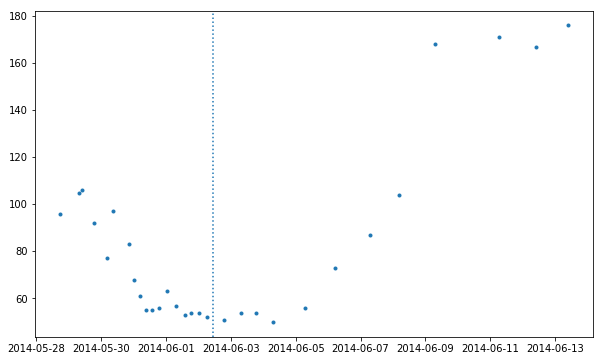

9019


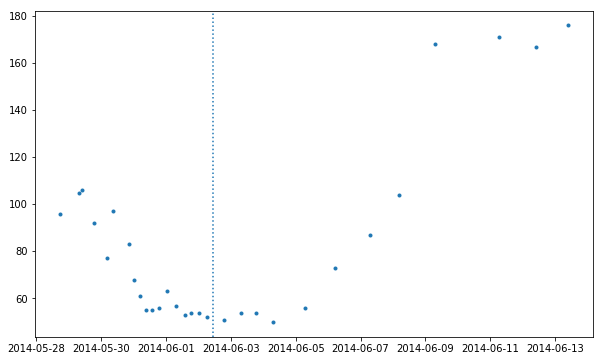

14243


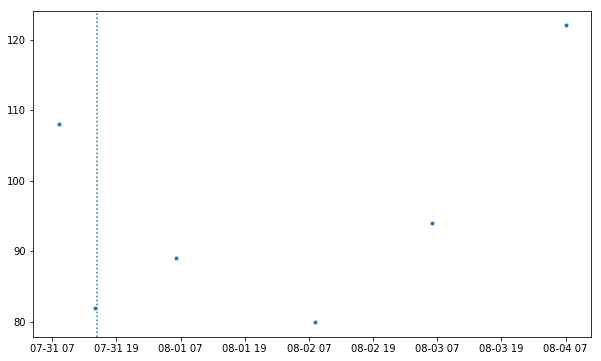

21493


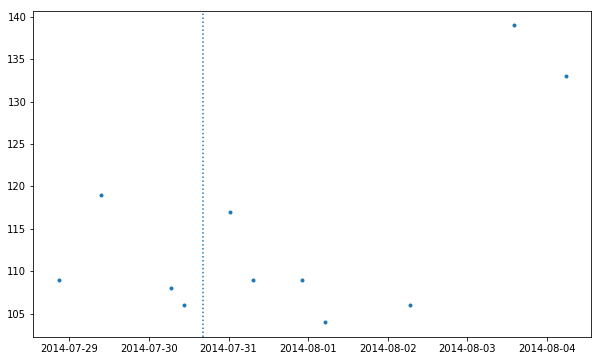

21810


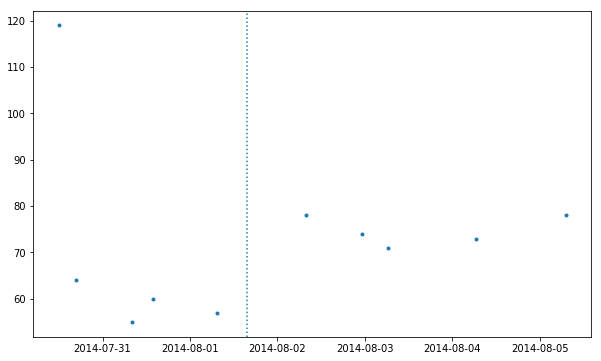

22846


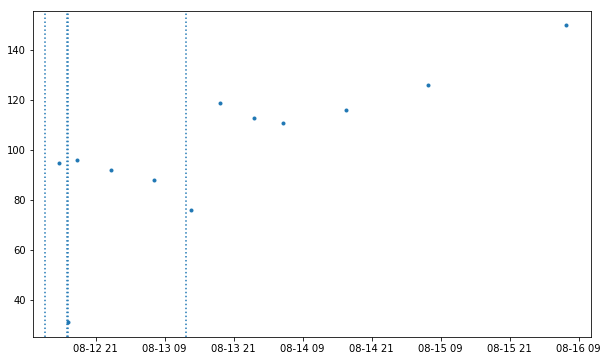

24172


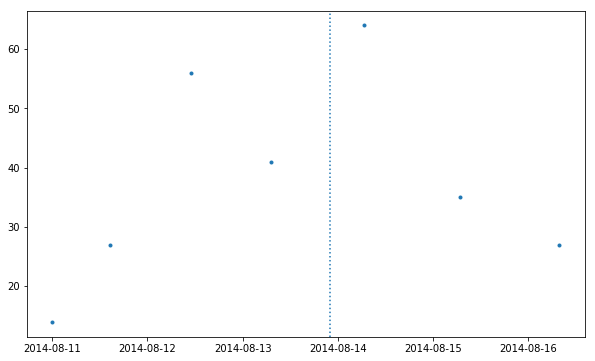

26041


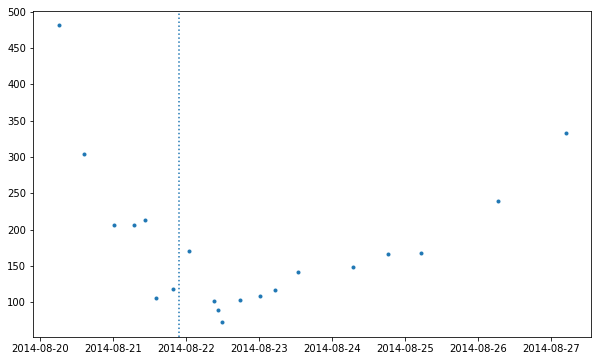

26535


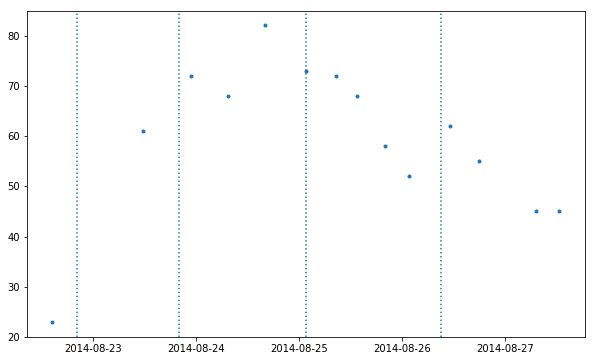

39820


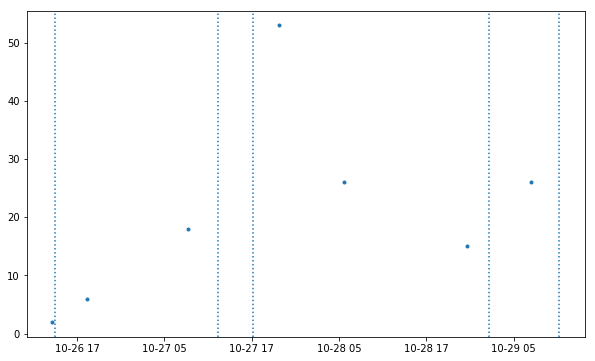

39880


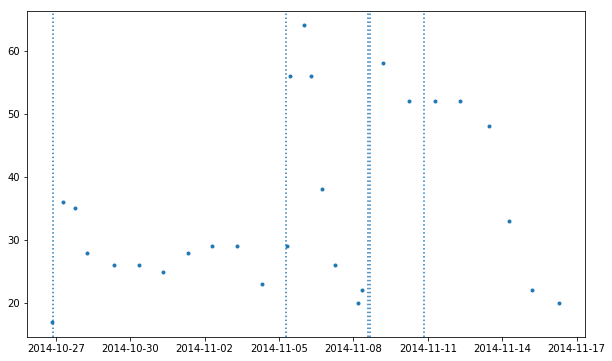

40278


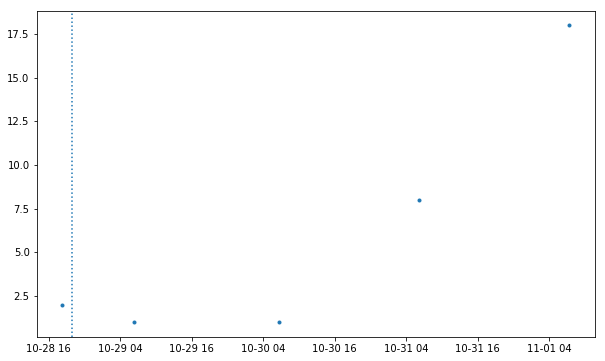

41259


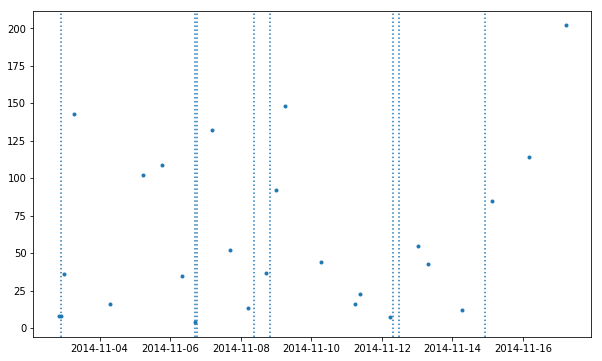

41391


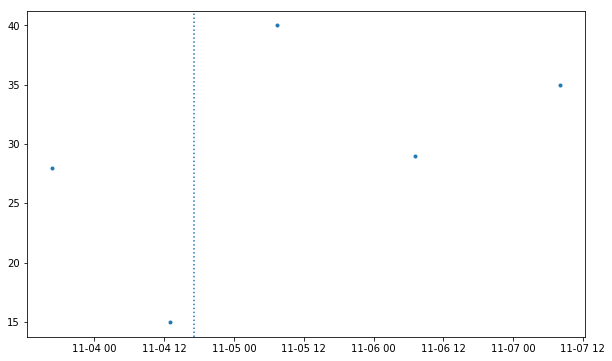

41580


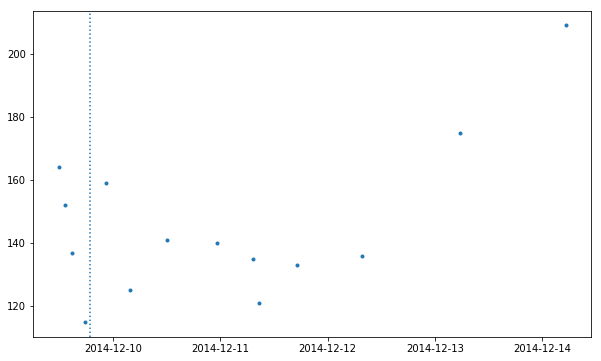

45535


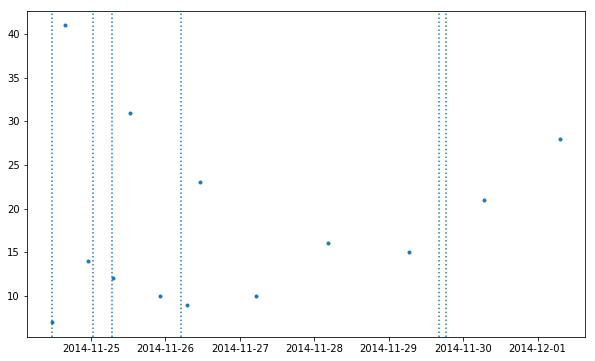

46232


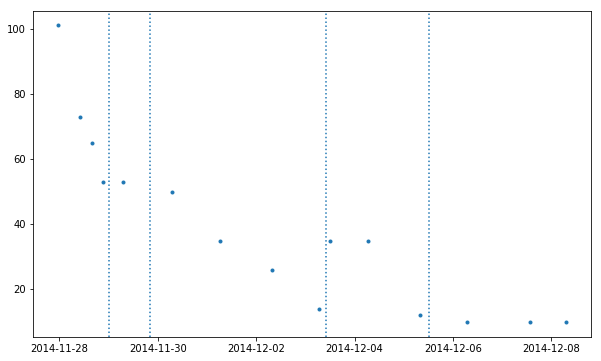

47871


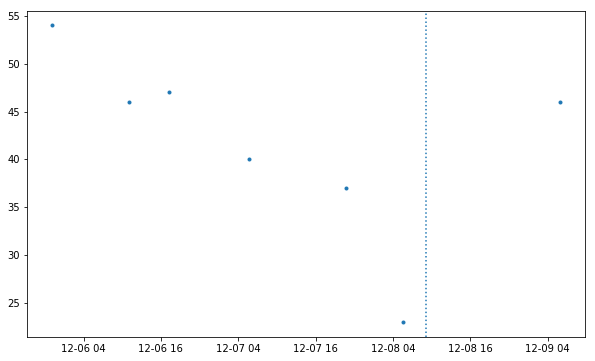

48933


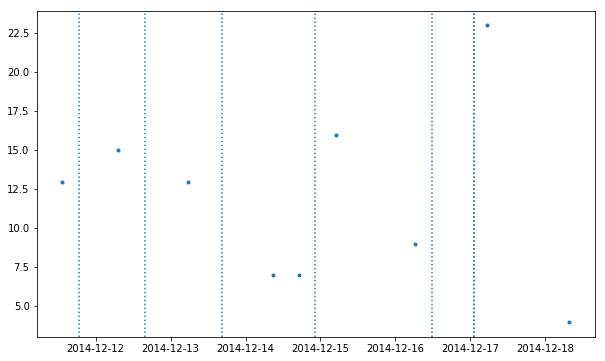

52675


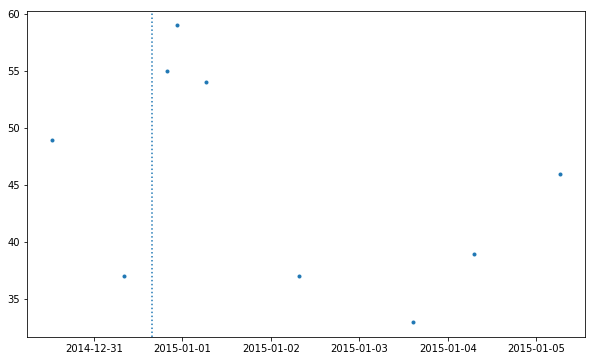

56764


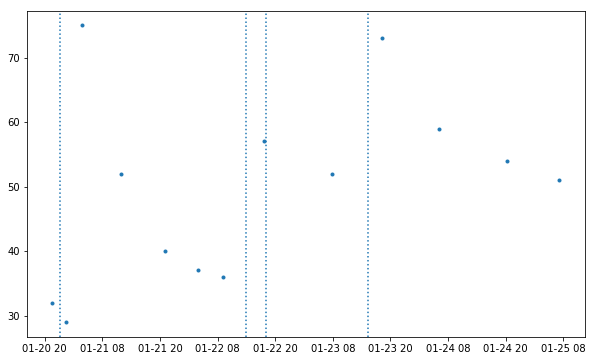

61342


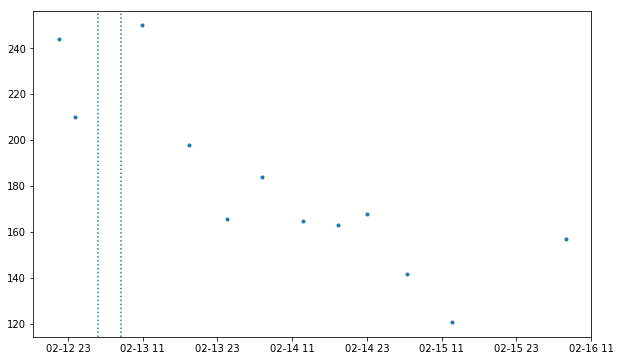

61734


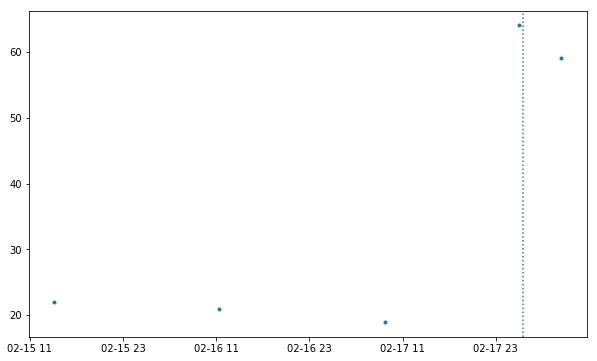

62080


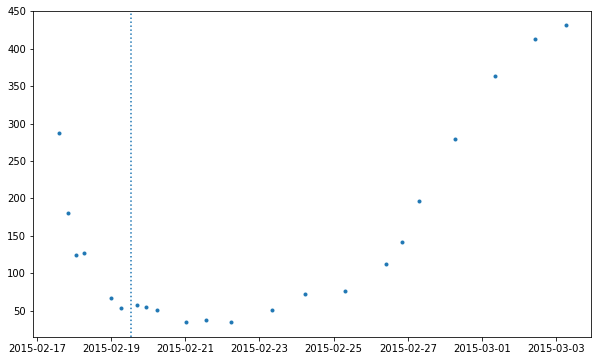

63689


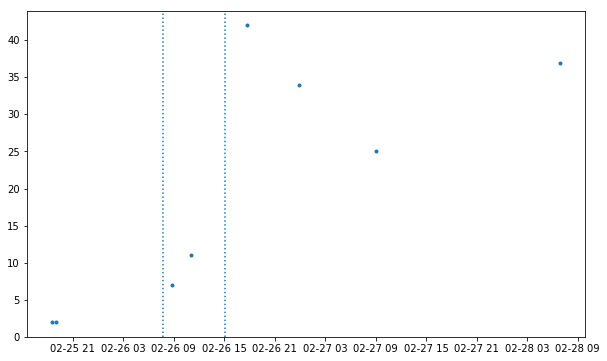

65467


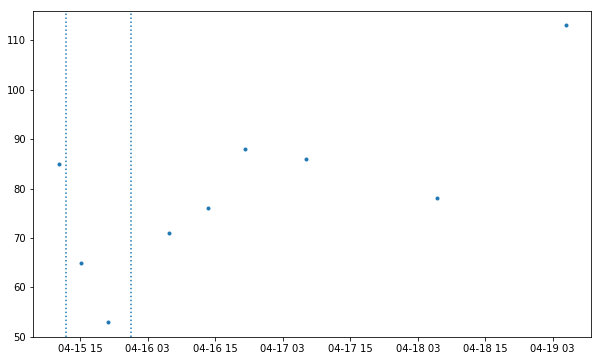

65948


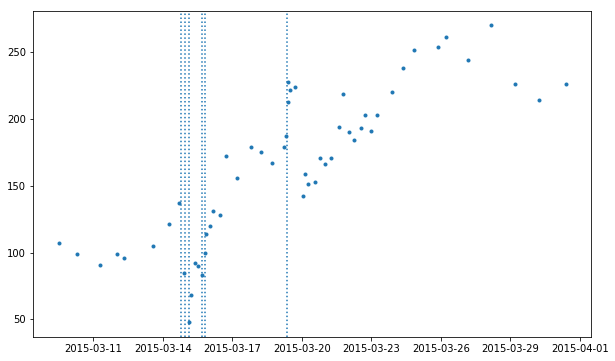

72028


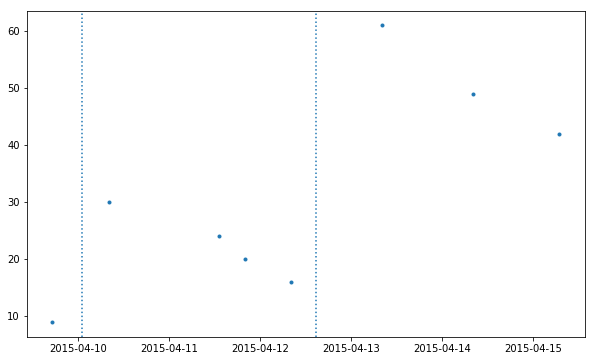

72107


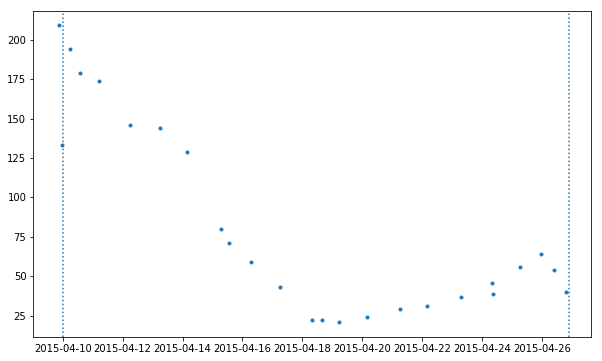

73527


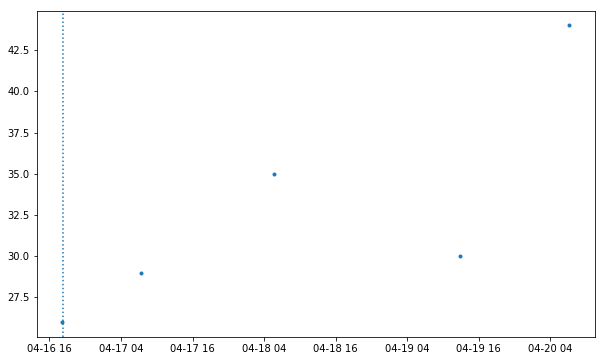

75414


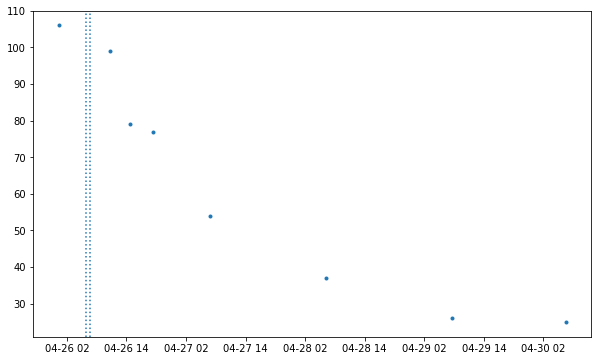

75484


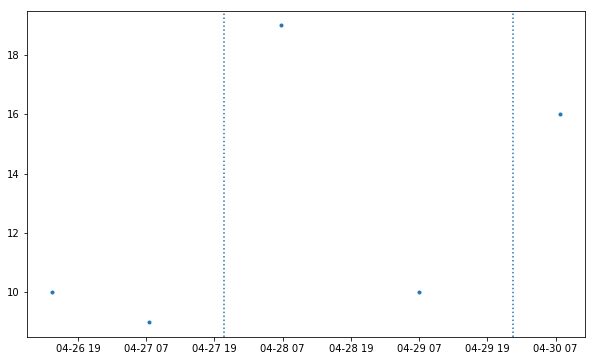

77601


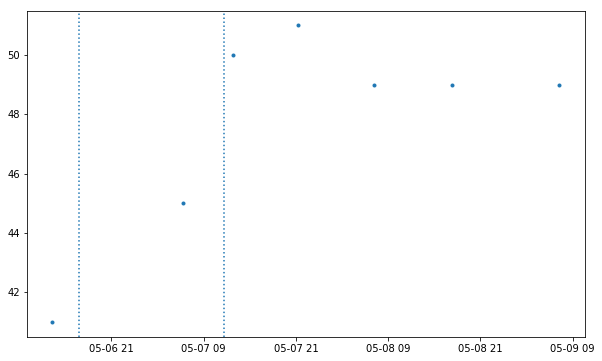

79029


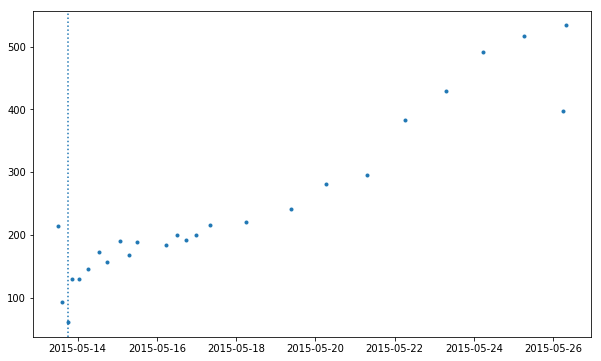

80172


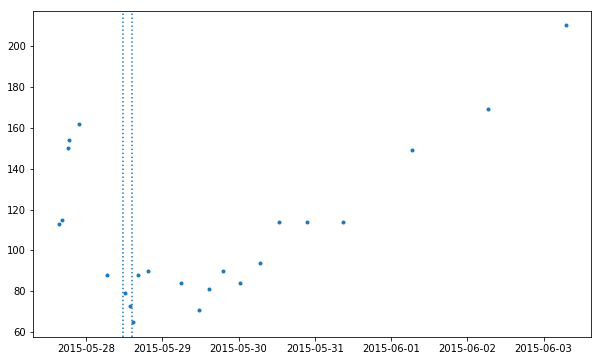

88435


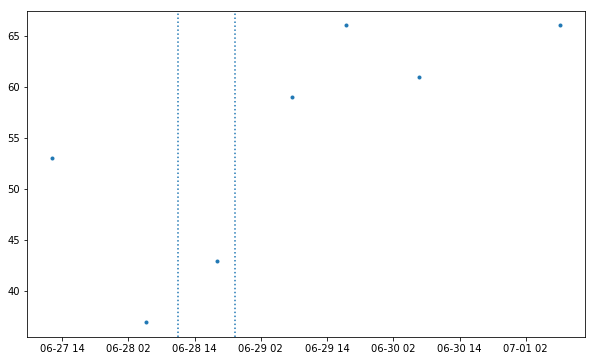

88566


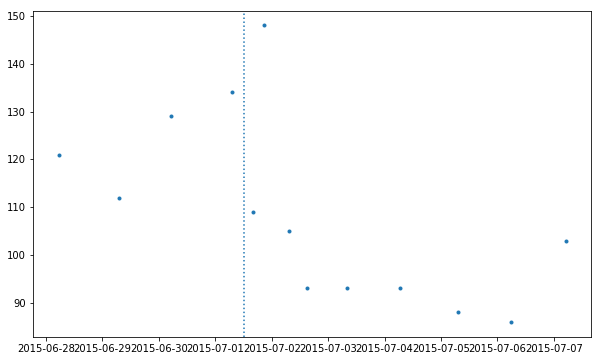

89834


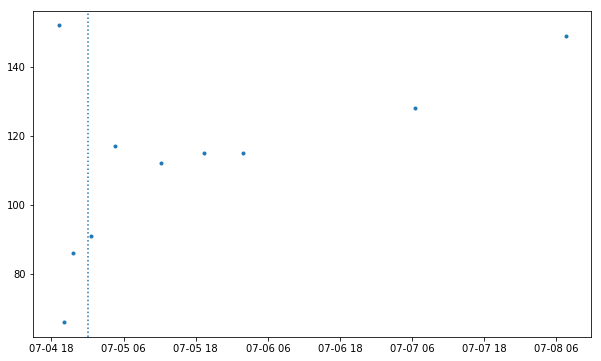

98771


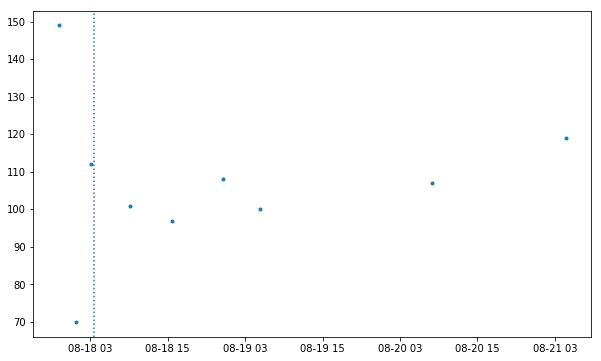

In [69]:
gp = df_t.groupby('enc_id').apply(lambda x: plot_group(x))